In [12]:
import matplotlib.pyplot as plt
import math
import numpy as np
import time

# Integrating the equations of motion for a test particle orbiting the Sun:

<font size=2>unit of time = [year]   unit of length = [AU]

Since $T_{earth} = 1 year$ and $T = 2\pi(\frac{a^3}{GM_s})^{1/2}$

$T_{earth} = 1 year = 2\pi(\frac{a_{earth}^3}{GM_s})^{1/2} $

$ a_{earth} = 1 AU $

$ => GM_s = 4\pi^2\ [AU^3\ Year^{-2}]  $
</font>

In [13]:
GMs = 4*math.pi**2

In [14]:
def walk(x,y,dx_dt,dy_dt,dt=0.01):
    global GMs
    
    def dx2_dt2(x,y):
        global GMs
        r = math.sqrt(x**2 + y**2)
        return -GMs*x/r**3,-GMs*y/r**3
        
    # calculate dx/dt and dy/dt
    def dx_dy(x,y,dx_dt,dy_dt,dt):
        k1_dx,k1_dy = dx2_dt2(x,y)
        k2_dx,k2_dy = dx2_dt2(x+(dt/2*k1_dx + dx_dt)*dt/2,y+(dt/2*k1_dy + dy_dt)*dt/2)
        k3_dx,k3_dy = dx2_dt2(x+(dt/2*k2_dx + dx_dt)*dt/2,y+(dt/2*k2_dy + dy_dt)*dt/2)
        k4_dx,k4_dy = dx2_dt2(x+(dt*k3_dx + dx_dt)*dt,y+(dt*k3_dy + dy_dt)*dt)
        dx_dt_new = dx_dt + dt/6*( k1_dx + 2 * k2_dx + 2 * k3_dx + k4_dx )
        dy_dt_new = dy_dt + dt/6*( k1_dy + 2 * k2_dy + 2 * k3_dy + k4_dy )
        return dx_dt_new,dy_dt_new
    
    dx_dt_new,dy_dt_new = dx_dy(x[-1],y[-1],dx_dt[-1],dy_dt[-1],dt)
    
    
    # calculate x and y
    k1_x = dx_dt[-1]
    k1_y = dy_dt[-1]
    k2_x,k2_y = dx_dy(x[-1]+dt/2*k1_x,y[-1]+dt/2*k1_y,dx_dt[-1],dy_dt[-1],dt/2)
    k3_x,k3_y = dx_dy(x[-1]+dt/2*k2_x,y[-1]+dt/2*k2_y,dx_dt[-1],dy_dt[-1],dt/2)
    k4_x,k4_y = dx_dy(x[-1]+dt*k3_x,y[-1]+dt*k3_y,dx_dt[-1],dy_dt[-1],dt)
    x_new = x[-1] + dt/6*( k1_x + 2 * k2_x + 2 * k3_x + k4_x )
    y_new = y[-1] + dt/6*( k1_y + 2 * k2_y + 2 * k3_y + k4_y )
    x.append(x_new)
    y.append(y_new)
    
    dx_dt.append(dx_dt_new)
    dy_dt.append(dy_dt_new)

Text(0.5, 1.0, 'x=1,y=0,vx=0,vy=2pi')

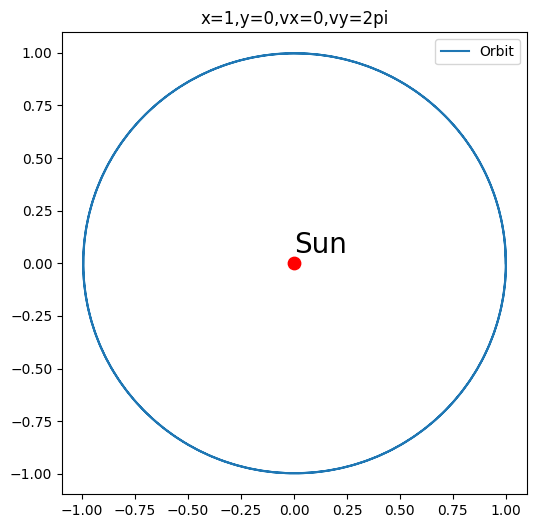

In [15]:
x = [1]
y = [0]
dx_dt = [0]
dy_dt = [2*math.pi]
T = np.linspace(0,2,200)
for t in T:
    walk(x,y,dx_dt,dy_dt)
fig= plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.legend(["Orbit"])
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x=1,y=0,vx=0,vy=2pi")

In [16]:
from IPython import display
import time
import ipywidgets
from ipywidgets import widgets
import time

def f_t_update(x,y,dx_dt,dy_dt):
    walk(x,y,dx_dt,dy_dt)
    plt.scatter(x[-1],y[-1])
    plt.ylim(-3,3)
    plt.xlim(-3,3)

T = 0
button = widgets.Button(description = "Click")
out = widgets.Output()
display.display(widgets.VBox([out,button],layout=ipywidgets.Layout(align_items='center')))
x = [1]
y = [0]
dx_dt = [0]
dy_dt = [2*math.pi]

def on_button_clicked(b):
    global T
    while(T<3):
        f_t_update(x,y,dx_dt,dy_dt)
        T = T + 0.1
        with out:
            display.clear_output(wait=True)
            plt.show()
#        time.sleep(0.1)
button.on_click(on_button_clicked)

In [17]:
x = [1]
y = [0]
dx_dt = [0]
dy_dt = [2*math.pi]
T = np.linspace(0,2,200)
for t in T:
    walk(x,y,dx_dt,dy_dt)
    if math.sqrt( ( x[0] - x[-1] )**2 + ( y[0] - y[-1])**2 ) < 0.1:
        print(t)

0.0
0.9849246231155779
0.9949748743718593
1.0050251256281406
1.9798994974874373
1.9899497487437185
2.0


<font size="2">We can find that the period is about 1 year
The analytical period is also 1 year, so in a short time, our numerical solution is reliable.
</font>

<font size=2>---------------------------------------------------------------------------
    
Another initial state</font>

Text(0.5, 1.0, 'x=1,y=0,vx=1,vy=2pi+1')

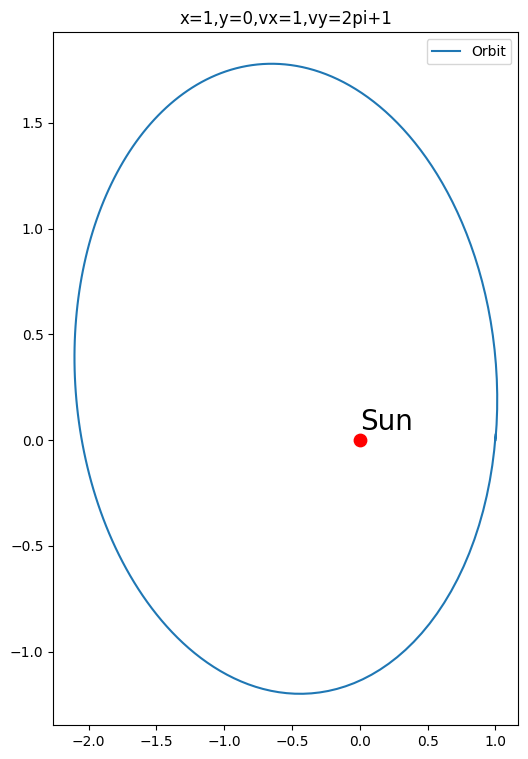

In [18]:
x = [1]
y = [0]
dx_dt = [1]
dy_dt = [2*math.pi+1]
T = np.linspace(0,2,200)
for t in T:
    walk(x,y,dx_dt,dy_dt)
fig= plt.figure(figsize=(6,9))
plt.plot(x,y)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x=1,y=0,vx=1,vy=2pi+1")

# Functions transforming between the Cartesian variables and the particle's position relative to an ellipse:

In [21]:
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton_krylov
import math
import numpy as np
import random

In [22]:
GMs = 4*math.pi**2

In [23]:
def ellipse_to_xy(a,e,theta,thetaE):
    r = a * ( 1 - e**2 )/( 1 + e * math.cos( theta - thetaE ) )
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    v = math.sqrt( 2 * ( GMs/r - GMs/2/a ) )
    h = math.sqrt( GMs * a * ( 1 - e**2 ) )
    def f(alpha):
        return ( h - x*v*math.sin(alpha) + y*v*math.cos(alpha)  )
    rang = np.linspace(-math.pi+0.1,math.pi-0.1,100)
    alpha = []
    for i in rang:
        alpha_temp = float(fsolve(f,i))
        while( alpha_temp < -math.pi or alpha_temp > math.pi):
            if alpha_temp > math.pi:
                alpha_temp = alpha_temp - 2*math.pi
            elif alpha_temp < -math.pi:
                alpha_temp = alpha_temp + 2*math.pi
        if len(alpha) == 0:
            alpha.append(alpha_temp)
        flag = False
        for a in alpha:
            if (abs(a - alpha_temp) < 0.000001):
                flag = True
        if not flag:
            alpha.append(alpha_temp)
    theta_temp = theta + math.pi/2
    alpha_need = 0
    if math.sin(theta - thetaE) >= 0:
        for a in alpha:
            if math.sin(a - theta_temp) <= 0:
                alpha_need = a
    elif math.sin(theta - thetaE) <= 0:
        for a in alpha:
            if math.sin(a - theta_temp) >= 0:
                alpha_need = a
    alpha = alpha_need
    vx = v*math.cos(float(alpha))
    vy = v*math.sin(float(alpha))
    return x,y,vx,vy

In [24]:
def xy_to_ellipse(x,y,vx,vy):
    r = math.sqrt( x**2 + y**2 )
    v = math.sqrt( vx**2 + vy**2 )
    theta = math.atan2(y,x)  # theta = (-pi,pi)
    a = 0.5 * GMs / ( GMs/r - 0.5 * v**2 )
    vr = (math.cos(theta)*vx + math.sin(theta)*vy)/r
    h = x*vy - y*vx
    if (h**2/GMs/a >= 1):
        e = 0
        thetaE = theta
        return a,e,theta,thetaE
    else:
        e = math.sqrt( 1 - h**2 / GMs / a)
    if vr > 0:
        thetaE =  theta - math.acos( ( a/r*(1-e**2) - 1) / e )
    elif vr < 0:
        thetaE =  theta + math.acos( ( a/r*(1-e**2) - 1) / e )
    while( thetaE < -math.pi or thetaE > math.pi):
        if thetaE > math.pi:
            thetaE = thetaE - 2*math.pi
        elif thetaE < -math.pi:
            thetaE = thetaE + 2*math.pi
    return a,e,theta,thetaE,r

In [25]:
x,y,vx,vy = ellipse_to_xy(0.1,0.2,0.4,0.3)
print(x,y,vx,vy)

0.0737462835609025 0.031179428596691153 -9.095537596336255 22.552731054715817


/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return ( h - x*v*math.sin(alpha) + y*v*math.cos(alpha)  )
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_temp = float(fsolve(f,i))


In [26]:
xy_to_ellipse(x,y,vx,vy)

(0.09999999999999994,
 0.20000000000000565,
 0.4,
 0.2999999999995335,
 0.08006666663887788)

# Initialize a test particle ("Mercury"), integrate and simulate, and superimpose the analytic formula (i in readme) on these plots:

Initial state:
a = 0.39 AU

e = 0.206

$\theta = -3/4 \pi$

$\theta_E = -3/4 \pi$

In [27]:
x0,y0,vx0,vy0 = ellipse_to_xy(0.39,0.206,-0.75*math.pi,-0.75*math.pi)

/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return ( h - x*v*math.sin(alpha) + y*v*math.cos(alpha)  )
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_temp = float(fsolve(f,i))
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  alpha_temp = float(fsolve(f,i))


Text(0.5, 1.0, 'x=-0.2189626858622263 y=-0.21896268586222636 vx=8.767907599526588 vy=-8.76790781528065')

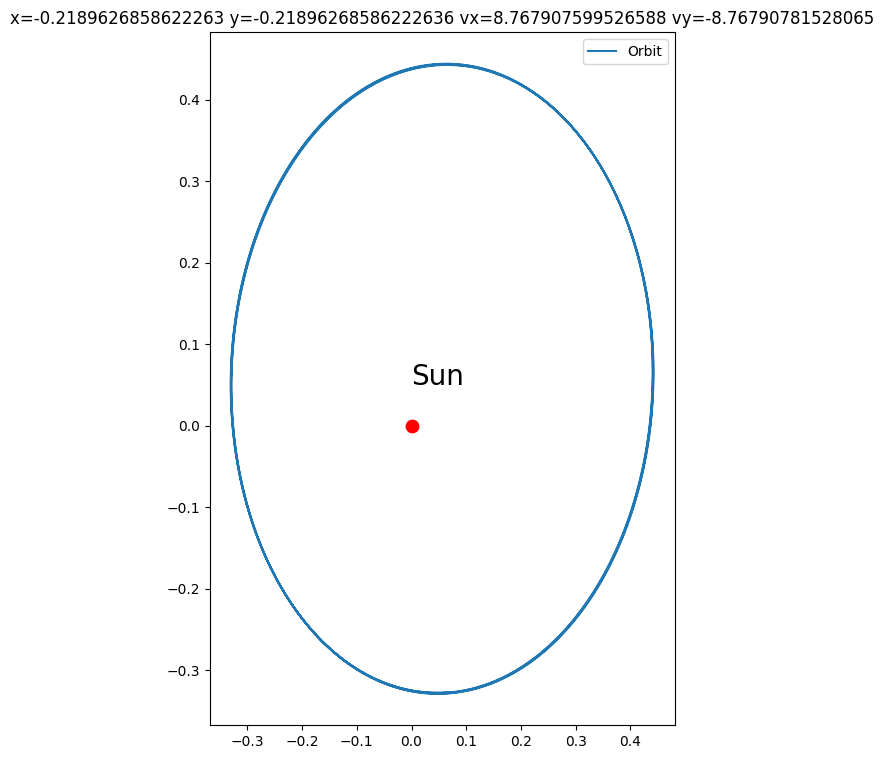

In [28]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
T = np.linspace(0,1,1000)
for t in T:
    walk(x,y,dx_dt,dy_dt,dt=0.001)
fig= plt.figure(figsize=(6,9))
plt.plot(x,y)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x="+str(x0)+" y="+str(y0)+" vx="+str(vx0)+" vy="+str(vy0))

Text(0.5, 1.0, 'x=-0.2189626858622263 y=-0.21896268586222636 vx=8.767907599526588 vy=-8.76790781528065')

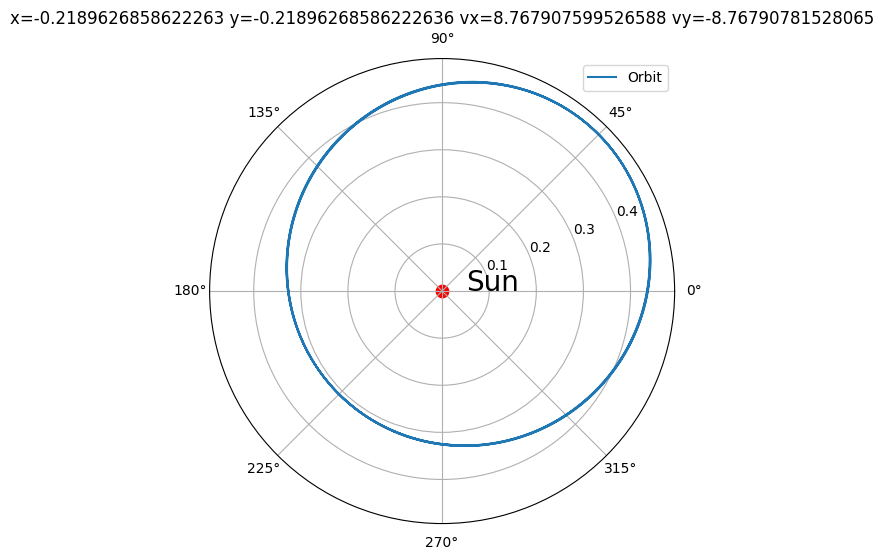

In [29]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
T = np.linspace(0,1,1000)
r = []
theta = []
for t in T:
    walk(x,y,dx_dt,dy_dt,dt=0.001)
    _,_,theta_temp,_,r_temp = xy_to_ellipse(x[-1],y[-1],dx_dt[-1],dy_dt[-1])
    r.append(r_temp)
    theta.append(theta_temp)
fig= plt.figure(figsize=(6,9))
#plt.plot(x,y)
plt.polar(theta,r)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x="+str(x0)+" y="+str(y0)+" vx="+str(vx0)+" vy="+str(vy0))

Simulation Plot v.s. Analytic Plot

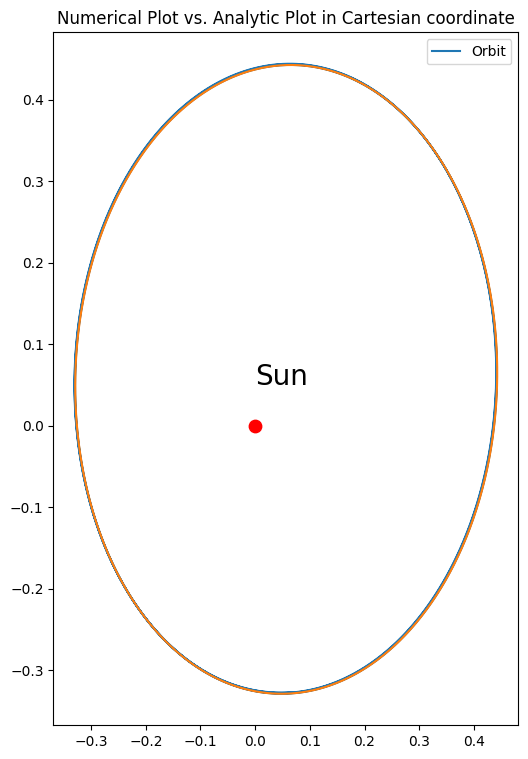

In [30]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
T = np.linspace(0,1,1000)
for t in T:
    walk(x,y,dx_dt,dy_dt,dt=0.001)
fig= plt.figure(figsize=(6,9))
plt.plot(x,y)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("Numerical Plot vs. Analytic Plot in Cartesian coordinate")

analytic_theta = np.linspace(-math.pi,math.pi,1000)
analytic_r = [ 0.39*(1-0.206**2)/(1+0.206*math.cos( i +0.75*math.pi))  for i in analytic_theta    ]
analytic_x = [r*math.cos(theta) for (r,theta) in zip(analytic_r,analytic_theta)]
analytic_y = [r*math.sin(theta) for (r,theta) in zip(analytic_r,analytic_theta)]
plt.plot(analytic_x,analytic_y)

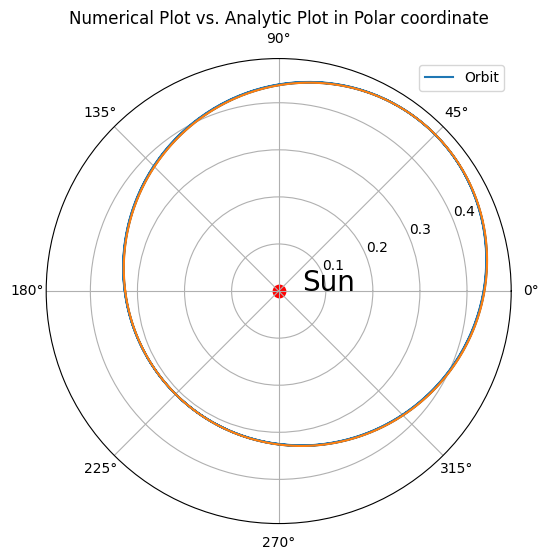

In [31]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
T = np.linspace(0,1,1000)
r = []
theta = []
for t in T:
    walk(x,y,dx_dt,dy_dt,dt=0.001)
    _,_,theta_temp,_,r_temp = xy_to_ellipse(x[-1],y[-1],dx_dt[-1],dy_dt[-1])
    r.append(r_temp)
    theta.append(theta_temp)
fig= plt.figure(figsize=(6,9))
#plt.plot(x,y)
plt.polar(theta,r)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("Numerical Plot vs. Analytic Plot in Polar coordinate")

analytic_theta = np.linspace(-math.pi,math.pi,1000)
analytic_r = [ 0.39*(1-0.206**2)/(1+0.206*math.cos( i +0.75*math.pi))  for i in analytic_theta    ]
plt.plot(analytic_theta,analytic_r)

# The effect of Jupiter on the precession of Mercury's perihelion:

semimajor axis is 5.2 AU

T = 11.8618 year

$M_J = 1/1047 Ms$

with the effect of Jupiter:

$\ddot{x} = -GM_sx/r^3+GM_jx/(2a_j^3)$

$\ddot{y} = -GM_sy/r^3+GM_jy/(2a_j^3)$

In [32]:
GMs = 4*math.pi**2
GMj = 1/1047*GMs
aj = 5.2

In [33]:
def walk_withJupiter(x,y,dx_dt,dy_dt,dt=0.01):
    global GMs
    global GMj
    global aj
    
    def dx2_dt2(x,y):
        global GMs
        r = math.sqrt(x**2 + y**2)
        return -GMs*x/r**3+GMj*x/2/aj**3,-GMs*y/r**3+GMj*y/2/aj**3
        
    # calculate dx/dt and dy/dt
    def dx_dy(x,y,dx_dt,dy_dt,dt):
        k1_dx,k1_dy = dx2_dt2(x,y)
        k2_dx,k2_dy = dx2_dt2(x+(dt/2*k1_dx + dx_dt)*dt/2,y+(dt/2*k1_dy + dy_dt)*dt/2)
        k3_dx,k3_dy = dx2_dt2(x+(dt/2*k2_dx + dx_dt)*dt/2,y+(dt/2*k2_dy + dy_dt)*dt/2)
        k4_dx,k4_dy = dx2_dt2(x+(dt*k3_dx + dx_dt)*dt,y+(dt*k3_dy + dy_dt)*dt)
        dx_dt_new = dx_dt + dt/6*( k1_dx + 2 * k2_dx + 2 * k3_dx + k4_dx )
        dy_dt_new = dy_dt + dt/6*( k1_dy + 2 * k2_dy + 2 * k3_dy + k4_dy )
        return dx_dt_new,dy_dt_new
    
    dx_dt_new,dy_dt_new = dx_dy(x[-1],y[-1],dx_dt[-1],dy_dt[-1],dt)
    
    
    # calculate x and y
    k1_x = dx_dt[-1]
    k1_y = dy_dt[-1]
    k2_x,k2_y = dx_dy(x[-1]+dt/2*k1_x,y[-1]+dt/2*k1_y,dx_dt[-1],dy_dt[-1],dt/2)
    k3_x,k3_y = dx_dy(x[-1]+dt/2*k2_x,y[-1]+dt/2*k2_y,dx_dt[-1],dy_dt[-1],dt/2)
    k4_x,k4_y = dx_dy(x[-1]+dt*k3_x,y[-1]+dt*k3_y,dx_dt[-1],dy_dt[-1],dt)
    x_new = x[-1] + dt/6*( k1_x + 2 * k2_x + 2 * k3_x + k4_x )
    y_new = y[-1] + dt/6*( k1_y + 2 * k2_y + 2 * k3_y + k4_y )
    x.append(x_new)
    y.append(y_new)
    
    dx_dt.append(dx_dt_new)
    dy_dt.append(dy_dt_new)

In [34]:
x0,y0,vx0,vy0 = ellipse_to_xy(0.39,0.206,-0.75*math.pi,-0.75*math.pi)

/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return ( h - x*v*math.sin(alpha) + y*v*math.cos(alpha)  )
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_temp = float(fsolve(f,i))
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  alpha_temp = float(fsolve(f,i))


Text(0.5, 1.0, 'x=-0.2189626858622263 y=-0.21896268586222636 vx=8.767907599526588 vy=-8.76790781528065')

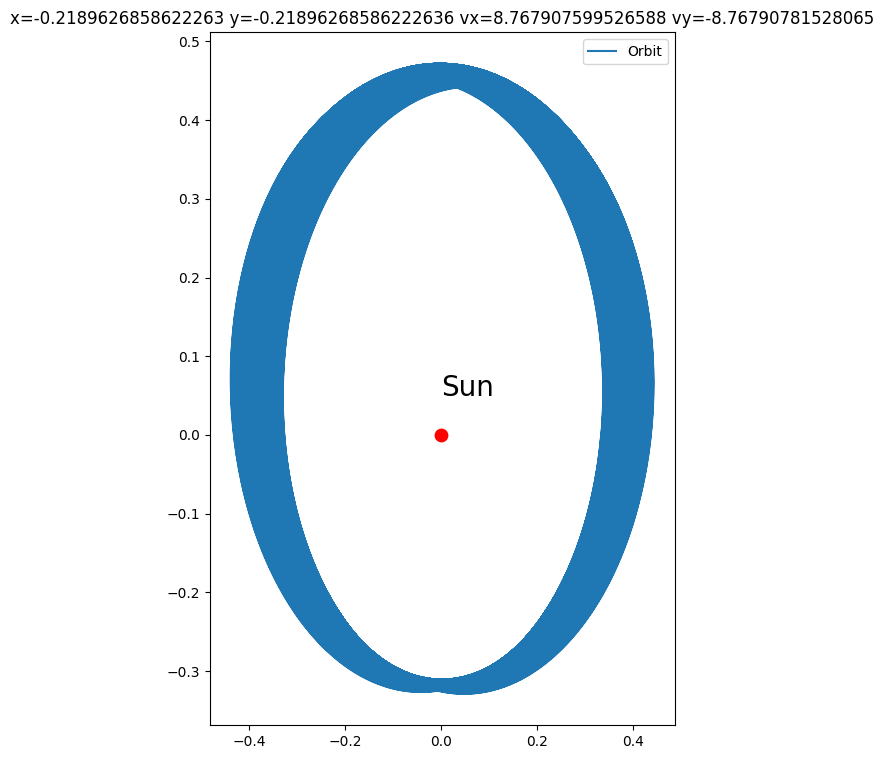

In [35]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
dt = 0.001
T = np.linspace(0,50,int(50/dt))
thetaE = []
for t in T:
    walk_withJupiter(x,y,dx_dt,dy_dt,dt=dt)
    _,_,_,thetaE_temp,_ = xy_to_ellipse(x[-1],y[-1],dx_dt[-1],dy_dt[-1])
    thetaE.append(thetaE_temp)
fig= plt.figure(figsize=(6,9))
plt.plot(x,y)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x="+str(x0)+" y="+str(y0)+" vx="+str(vx0)+" vy="+str(vy0))

Text(0, 0.5, 'ThetaE')

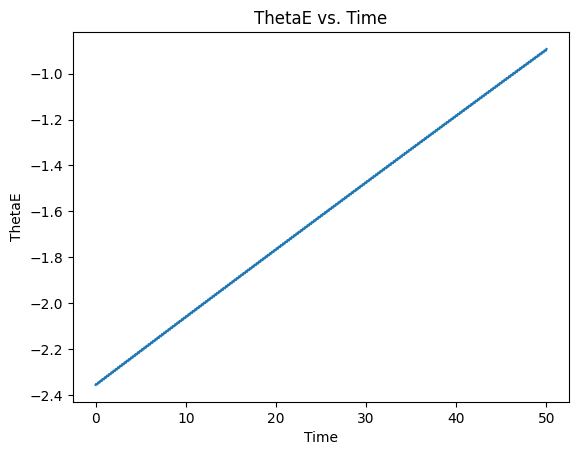

In [36]:
plt.plot(T,thetaE)
plt.title("ThetaE vs. Time")
plt.xlabel("Time")
plt.ylabel("ThetaE")

In [37]:
omega,_ = np.polyfit(T,thetaE,1)

In [38]:
print("Rate in radians per year: "+str(omega))

Rate in radians per year: 0.029224960364095144


In [39]:
print("Rate in arcseconds per century: "+str(omega/math.pi*180*3600*100))

Rate in arcseconds per century: 602808.0787079156


## Compare with the analytic result, there is an error about 0.57.

# Include Venus, Earth, Mars, Jupiter, and Saturn's effect on Mercury's precession (different from the pre-general-relativity result of 531 arcseconds per century):

In [40]:
GMs = 4*math.pi**2
GMj = 1/1047*GMs
aj = 5.2
GMv = 2.4478383*1e-6*GMs
av = 0.723
GMe = 3.00348959632*1e-6*GMs
ae = 1
GMm = 0.3227151*1e-6*GMs
am = 1.524
GMsa = 285.8860*1e-6*GMs
asa = 9.537

In [41]:
def walk_withPlanets(x,y,dx_dt,dy_dt,dt=0.01):
    global GMs
    global GMj
    global aj
    global GMv
    global GMe
    global GMm
    global GMsa
    global av
    global ae
    global am
    global asa
    
    def dx2_dt2(x,y):
        global GMs
        r = math.sqrt(x**2 + y**2)
        return -GMs*x/r**3+GMj/2/aj**3*x+GMv/2/av**3*x+GMe/2/ae**3*x+GMm/2/am**3*x+GMsa/2/asa**3*x,-GMs*y/r**3+GMj/2/aj**3*y+GMv/2/av**3*y+GMe/2/ae**3*y+GMm/2/am**3*y+GMsa/2/asa**3*y
        
    # calculate dx/dt and dy/dt
    def dx_dy(x,y,dx_dt,dy_dt,dt):
        k1_dx,k1_dy = dx2_dt2(x,y)
        k2_dx,k2_dy = dx2_dt2(x+(dt/2*k1_dx + dx_dt)*dt/2,y+(dt/2*k1_dy + dy_dt)*dt/2)
        k3_dx,k3_dy = dx2_dt2(x+(dt/2*k2_dx + dx_dt)*dt/2,y+(dt/2*k2_dy + dy_dt)*dt/2)
        k4_dx,k4_dy = dx2_dt2(x+(dt*k3_dx + dx_dt)*dt,y+(dt*k3_dy + dy_dt)*dt)
        dx_dt_new = dx_dt + dt/6*( k1_dx + 2 * k2_dx + 2 * k3_dx + k4_dx )
        dy_dt_new = dy_dt + dt/6*( k1_dy + 2 * k2_dy + 2 * k3_dy + k4_dy )
        return dx_dt_new,dy_dt_new
    
    dx_dt_new,dy_dt_new = dx_dy(x[-1],y[-1],dx_dt[-1],dy_dt[-1],dt)
    
    
    # calculate x and y
    k1_x = dx_dt[-1]
    k1_y = dy_dt[-1]
    k2_x,k2_y = dx_dy(x[-1]+dt/2*k1_x,y[-1]+dt/2*k1_y,dx_dt[-1],dy_dt[-1],dt/2)
    k3_x,k3_y = dx_dy(x[-1]+dt/2*k2_x,y[-1]+dt/2*k2_y,dx_dt[-1],dy_dt[-1],dt/2)
    k4_x,k4_y = dx_dy(x[-1]+dt*k3_x,y[-1]+dt*k3_y,dx_dt[-1],dy_dt[-1],dt)
    x_new = x[-1] + dt/6*( k1_x + 2 * k2_x + 2 * k3_x + k4_x )
    y_new = y[-1] + dt/6*( k1_y + 2 * k2_y + 2 * k3_y + k4_y )
    x.append(x_new)
    y.append(y_new)
    
    dx_dt.append(dx_dt_new)
    dy_dt.append(dy_dt_new)

In [42]:
x0,y0,vx0,vy0 = ellipse_to_xy(0.39,0.206,-0.75*math.pi,-0.75*math.pi)

/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return ( h - x*v*math.sin(alpha) + y*v*math.cos(alpha)  )
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_temp = float(fsolve(f,i))
/var/folders/s8/ffxrdr3s6rb3rzdhmw6ht6jw0000gn/T/ipykernel_42526/1386319094.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  alpha_temp = float(fsolve(f,i))


Text(0.5, 1.0, 'x=-0.2189626858622263 y=-0.21896268586222636 vx=8.767907599526588 vy=-8.76790781528065')

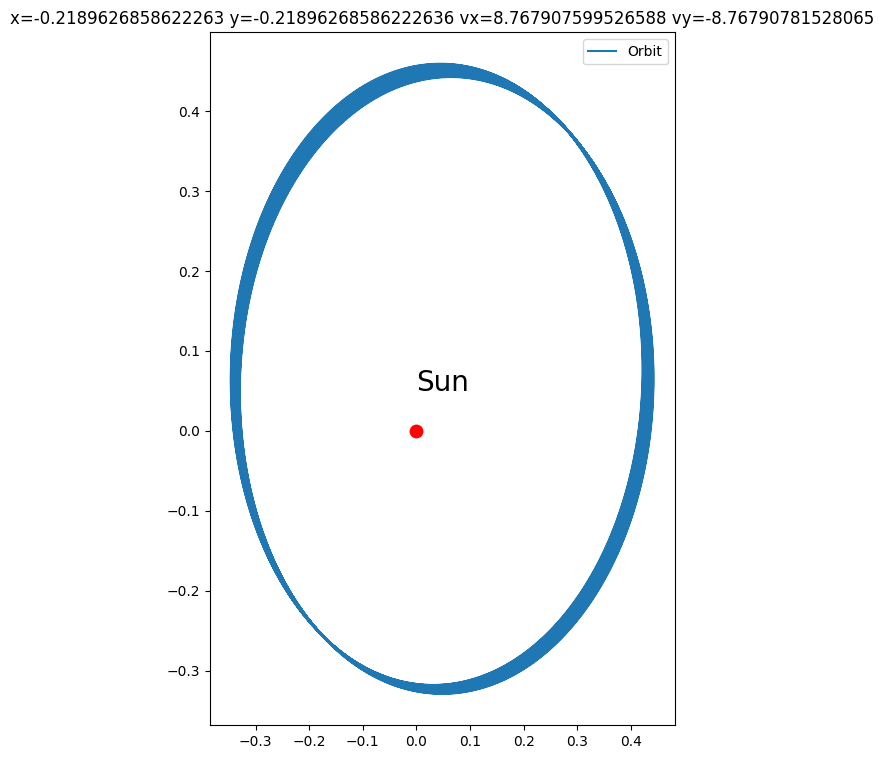

In [43]:
x = [x0]
y = [y0]
dx_dt = [vx0]
dy_dt = [vy0]
T = np.linspace(0,10,10000)
thetaE = []
for t in T:
    walk_withPlanets(x,y,dx_dt,dy_dt,dt=0.001)
    _,_,_,thetaE_temp,_ = xy_to_ellipse(x[-1],y[-1],dx_dt[-1],dy_dt[-1])
    thetaE.append(thetaE_temp)
fig= plt.figure(figsize=(6,9))
plt.plot(x,y)
plt.legend(["Orbit"])
#plt.scatter(x,y)
plt.scatter(0,0,color="red",s=80)
plt.text(0,0.05,"Sun",fontsize=20)
plt.title("x="+str(x0)+" y="+str(y0)+" vx="+str(vx0)+" vy="+str(vy0))

Text(0, 0.5, 'ThetaE')

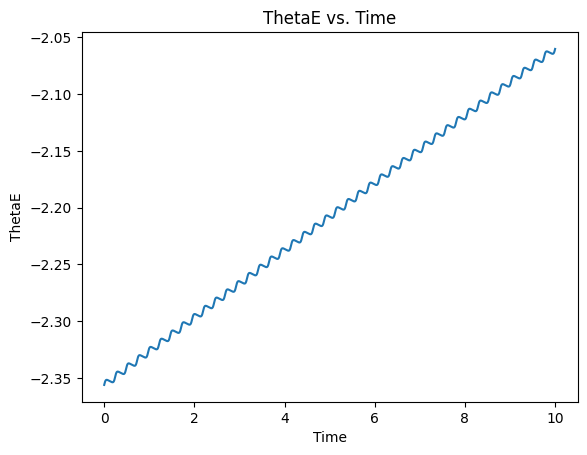

In [44]:
plt.plot(T,thetaE)
plt.title("ThetaE vs. Time")
plt.xlabel("Time")
plt.ylabel("ThetaE")

In [45]:
omega = (thetaE[-1] - thetaE[0])/10
print(omega)

0.029575125586862684


In [46]:
print("Rate in radians per year: "+str(omega))

Rate in radians per year: 0.029575125586862684


In [47]:
print("Rate in arcseconds per century: "+str(omega*60*60*100))

Rate in arcseconds per century: 10647.045211270566


# Double Pendulum

In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def walk(theta1,theta2,theta1_dt,theta2_dt,dt=0.01):
    m = 1
    l = 1
    g = 1
    p_theta1 = 1/6*m*(l**2)*( 8*theta1_dt + 3*theta2_dt * math.cos(theta1 - theta2) )
    p_theta2 = 1/6*m*(l**2)*( 2*theta2_dt + 3*theta1_dt * math.cos(theta1 - theta2) )
    
    def p_theta1_dt(theta1,theta2,theta1_dt,theta2_dt):
        p_theta1_dt = -0.5*m*l**2*(theta1_dt*theta2_dt*math.sin(theta1-theta2)+3*g/l*math.sin(theta1))
#        p_theta2_dt = -0.5*m*l**2*(-theta1_dt*theta2_dt*math.sin(theta1-theta2)+1*g/l*math.sin(theta2))
        return p_theta1_dt
    def p_theta2_dt(theta1,theta2,theta1_dt,theta2_dt):
#        p_theta1_dt = -0.5*m*l**2*(theta1_dt*theta2_dt*math.sin(theta1-theta2)+3*g/l*math.sin(theta1))
        p_theta2_dt = -0.5*m*l**2*(-theta1_dt*theta2_dt*math.sin(theta1-theta2)+1*g/l*math.sin(theta2))
        return p_theta2_dt
    

    
    def theta_dt(theta1,theta2,p_theta1,p_theta2):
        theta1_dt = 6/m/l**2*(2*p_theta1 - 3*math.cos(theta1-theta2)*p_theta2)/(16-9*math.cos(theta1-theta2)**2)
        theta2_dt = 6/m/l**2*(8*p_theta2 - 3*math.cos(theta1-theta2)*p_theta1)/(16-9*math.cos(theta1-theta2)**2)
        return theta1_dt,theta2_dt
    
    theta1_dt_new,theta2_dt_new = theta_dt(theta1,theta2,p_theta1,p_theta2) 
    
    k1_theta1,k1_theta2 = theta_dt(theta1,theta2,p_theta1,p_theta2)
    k2_theta1,k2_theta2 = theta_dt( theta1+k1_theta1*dt/2,theta2+k1_theta2*dt/2,p_theta1+dt/2*p_theta1_dt(theta1,theta2,k1_theta1,k1_theta2),p_theta2+dt/2*p_theta2_dt(theta1,theta2,k1_theta1,k1_theta2))
    k3_theta1,k3_theta2 = theta_dt( theta1+k2_theta1*dt/2,theta2+k2_theta2*dt/2,p_theta1+dt/2*p_theta1_dt(theta1,theta2,k2_theta1,k2_theta2),p_theta2+dt/2*p_theta2_dt(theta1,theta2,k2_theta1,k2_theta2))
    k4_theta1,k4_theta2 = theta_dt( theta1+k3_theta1*dt,theta2+k3_theta2*dt,p_theta1+dt*p_theta1_dt(theta1,theta2,k3_theta1,k3_theta2),p_theta2+dt*p_theta2_dt(theta1,theta2,k3_theta1,k3_theta2))
    
    theta1_new = theta1 + 1/6*dt*(k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1)
    theta2_new = theta2 + 1/6*dt*(k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2)
    
    p_theta1 = 1/6*m*l**2*( 8*theta1_dt + 3*theta2_dt * math.cos(theta1_new - theta2_new) )
    p_theta2 = 1/6*m*l**2*( 2*theta2_dt + 3*theta1_dt * math.cos(theta1_new - theta2_new) )
    
    theta1_dt_new = 1/6*(k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1)
    theta2_dt_new = 1/6*(k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2)
    
    return theta1_new,theta2_new,theta1_dt_new,theta2_dt_new

In [50]:
T = np.linspace(0,1000,10000)
theta1 = [math.pi/2]
theta2 = [math.pi/2]
theta1_dt = [0]
theta2_dt = [0]
dt = 0.1
for t in T:
    theta1_new,theta2_new,theta1_dt_new,theta2_dt_new = walk(theta1[-1],theta2[-1],theta1_dt[-1],theta2_dt[-1],dt=dt)
    theta1.append(theta1_new)
    theta2.append(theta2_new)
    theta1_dt.append(theta1_dt_new)
    theta2_dt.append(theta2_dt_new)    

In [51]:
l=1
x1 = []
x2 = []
y1 = []
y2 = []
x1 = [l/2*math.sin(i) for i in theta1]
x2 = [l*(math.sin(m)+0.5*math.sin(n)) for (m,n) in zip(theta1,theta2)]
y1 = [-l/2*math.cos(i) for i in theta1]
y2 = [-l*(math.cos(m)+0.5*math.cos(n)) for (m,n) in zip(theta1,theta2)]

x1_end = []
y1_end = []
x2_end = []
y2_end = []
x1_end = [l*math.sin(i) for i in theta1]
x2_end = [l*(math.sin(m)+math.sin(n)) for (m,n) in zip(theta1,theta2)]
y1_end = [-l*math.cos(i) for i in theta1]
y2_end = [-l*(math.cos(m)+math.cos(n)) for (m,n) in zip(theta1,theta2)]

In [52]:
def f_t_update(x1,y1,x2,y2,i):
    plt.plot((0,x1[i]),(0,y1[i]),color="black")
    plt.plot((x1[i],x2[i]),(y1[i],y2[i]),color="black")
    plt.xlim(-2.3,2.3)
    plt.ylim(-2.3,2.3)
    plt.scatter(0,0,color="red")
    plt.scatter(x1[i],y1[i],color="blue")
    plt.scatter(x2[i],y2[i],color="purple")
    plt.plot(x1[0:i+1],y1[0:i+1],color="blue")
    plt.plot(x2[0:i+1],y2[0:i+1],color="purple")

In [53]:
from IPython import display
import time
import ipywidgets
from ipywidgets import widgets
import time


T = 0
button = widgets.Button(description = "Click")
out = widgets.Output()
display.display(widgets.VBox([out,button],layout=ipywidgets.Layout(align_items='center')))
def on_button_clicked(b):
    i=0
    while(i<100):
        f_t_update(x1_end,y1_end,x2_end,y2_end,i)
        i = i+1
        with out:
            display.clear_output(wait=True)
            plt.show()
#        time.sleep(0.01)
button.on_click(on_button_clicked)

# Numerically solve for the evolution of a 2-dimensional double compound pendulum:

Text(0.5, 1.0, 'X vs. Y')

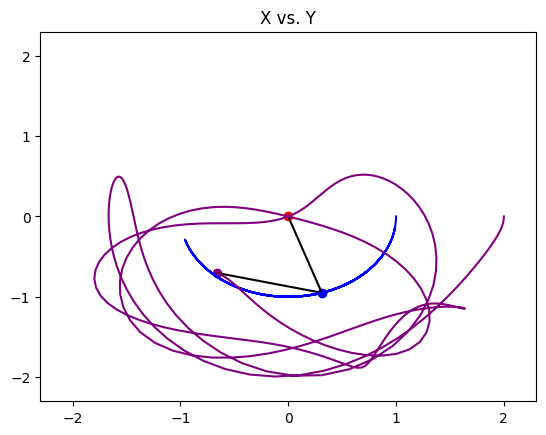

In [54]:
f_t_update(x1_end,y1_end,x2_end,y2_end,300)
plt.title("X vs. Y")